In [1]:
#generate data
from sklearn.datasets import make_regression
import numpy as np
X,y = make_regression(n_samples=1000,
                      n_features=1,
                      noise=0.4)

print(X[0],y[0])

[-2.12657223] -93.336786359946


In [2]:
X

array([[-2.12657223e+00],
       [ 4.92338115e-01],
       [-1.29852214e+00],
       [-8.24174836e-01],
       [ 1.24397812e+00],
       [-1.82176890e-01],
       [ 1.32922711e+00],
       [-8.84506258e-01],
       [-1.68748372e+00],
       [ 1.38614851e-01],
       [ 3.07450361e+00],
       [ 6.63545711e-01],
       [-4.14526908e-01],
       [-6.85406600e-01],
       [ 6.70844013e-01],
       [ 1.34268952e+00],
       [-6.09930126e-01],
       [ 5.60677715e-02],
       [ 8.61384926e-02],
       [-1.20331362e+00],
       [ 8.26480589e-01],
       [ 1.82060610e-01],
       [-8.70112987e-01],
       [-7.21786808e-01],
       [ 1.10975940e+00],
       [ 1.24999671e-01],
       [-6.68255631e-01],
       [ 1.66338431e-01],
       [-1.47179127e+00],
       [-1.35036333e+00],
       [ 1.01108371e+00],
       [ 7.29825238e-01],
       [ 2.31709023e-01],
       [ 1.20977545e+00],
       [ 2.34290987e-01],
       [-1.69221702e-01],
       [ 1.43451846e-01],
       [ 3.16897792e-01],
       [ 8.5

In [3]:
y

array([-9.33367864e+01,  2.23675408e+01, -5.75499304e+01, -3.69086547e+01,
        5.54686418e+01, -8.21584073e+00,  5.79925527e+01, -3.98960518e+01,
       -7.46989224e+01,  6.07664399e+00,  1.35832297e+02,  2.94278765e+01,
       -1.78503599e+01, -2.98351128e+01,  2.98335401e+01,  5.98487470e+01,
       -2.69150520e+01,  2.91996260e+00,  3.77749260e+00, -5.33139546e+01,
        3.67563114e+01,  8.31079253e+00, -3.80566416e+01, -3.17817531e+01,
        4.94363275e+01,  5.46380628e+00, -2.90035478e+01,  7.30797310e+00,
       -6.51395902e+01, -5.94983526e+01,  4.44081065e+01,  3.20500560e+01,
        1.06806527e+01,  5.30477333e+01,  1.01990788e+01, -7.54420458e+00,
        6.03722640e+00,  1.43272781e+01,  3.76695383e+01, -1.61806666e+01,
        9.04781011e+01,  2.33997289e+01, -1.51037905e+01, -7.57836076e+01,
       -1.99350100e+01, -2.39816053e+01, -7.85990592e+01, -4.90622633e+00,
        2.12650424e+01,  1.90402552e+01,  3.39068671e+01,  5.05384292e+01,
        5.64445030e+01,  

In [4]:
#1)loss function 
#A mean squared error function as the name suggests is the mean of squared sum of difference between true and predicted value.
    

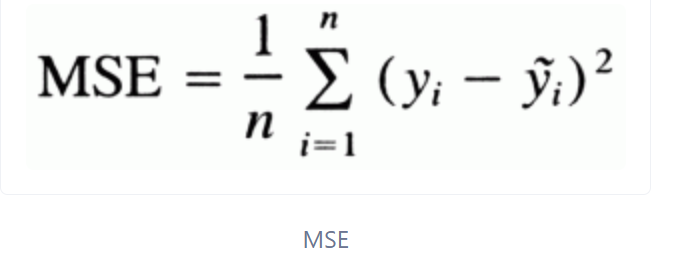

In [5]:
#As the predicted value of y depends on the slope and constant, hence our goal
#is to find the values for slope and constant that minimize the loss function or in other words, 
#minimize the difference between y predicted and true values.

In [6]:
#2)Optimization Algorithm-algorithms are used to find the optimal set of parameters given a
#training dataset that minimizes the loss function,
#need to find the optimal value of slope (m) and constant (b).
##One such Algorithm is Gradient Descent
#Gradient descent is by far the most popular optimization algorithm used in machine learning.
#Using gradient descent we iteratively calculate the gradients of the loss function with respect to the parameters 
#and keep on updating the parameters till we reach the local minima

In [7]:
#3)Steps to Implement Gradient Descent
#Step-1 Initializing the parameters
#Here, we need to initialize the values for our parameters. Let’s keep slope = 0 and constant = 0.
#We will also need a learning rate to determine the step size at each 
#iteration while moving toward a minimum value of our loss function.

#Step -2 Calculate the Partial Derivatives with respect to parameters

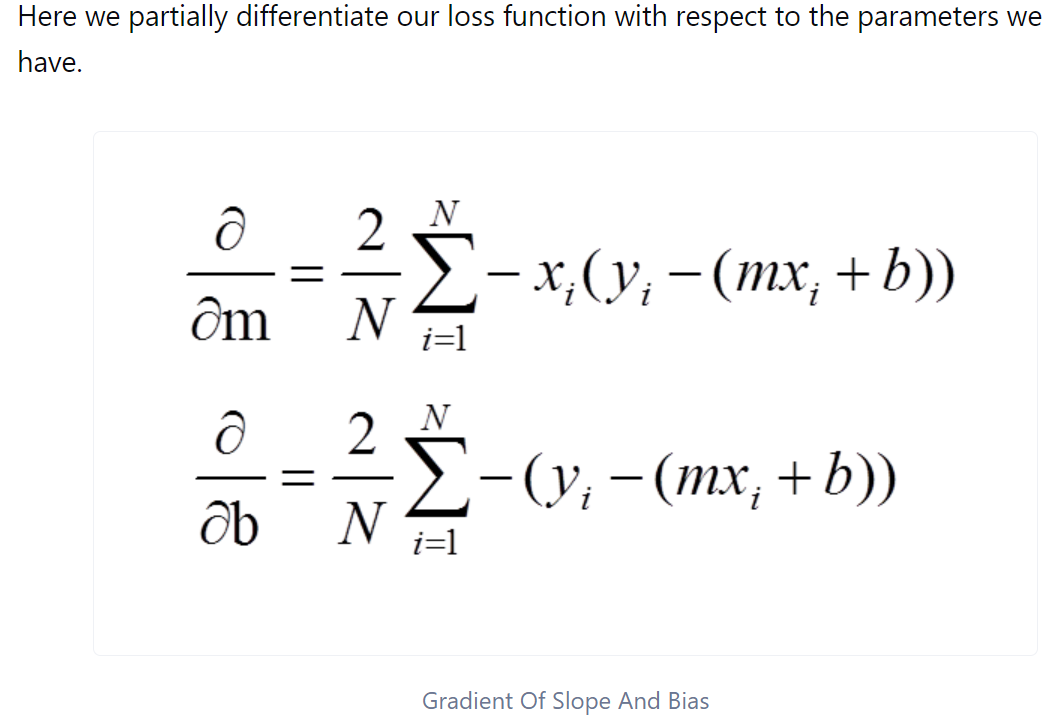

In [8]:
#Step – 3 Updating the parameters

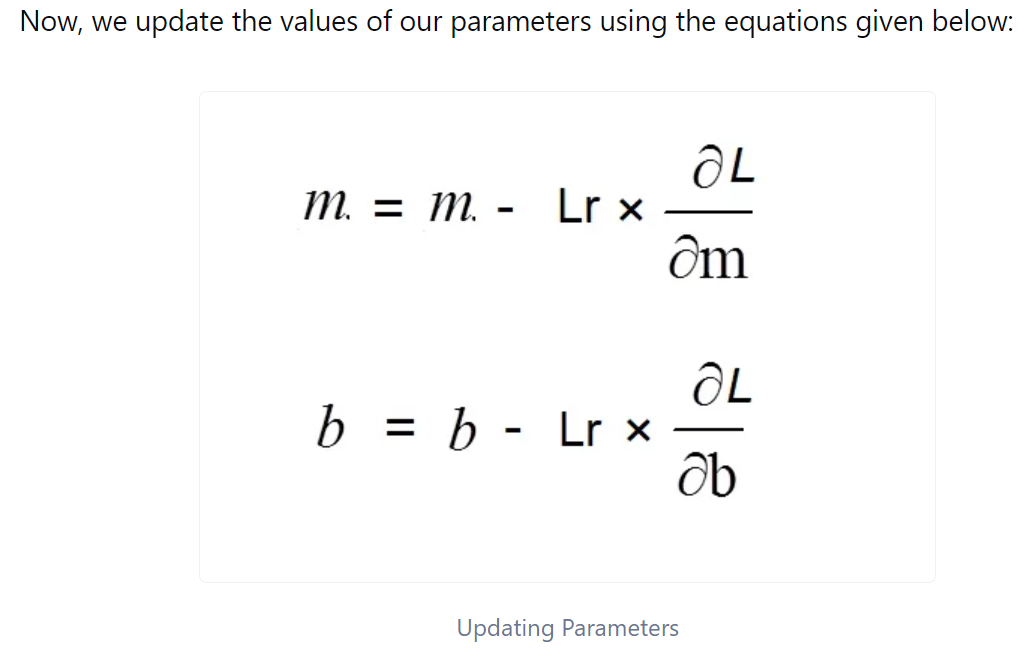

In [9]:
#The updated values for our parameters will be the values with which, 
#each step minimizes our loss function and reduces the difference between the true and predicted values.

#Repeat the process to reach a point of local minima.

In [10]:
class LinearRegression:
    def __init__(self,X,y,lr = 0.0001,epochs=1000):
        self.epochs=epochs
        self.lr=lr
        self.w=None
        self.b=None
        self.cost_list=[]
         
        
    def fit(self,X,y):
        self.w=np.zeros(X.shape[1])
        self.b=0
                      
        for _ in range(self.epochs):
            #y_preds = np.dot(X,self.w) + self.b
            y_preds = X.dot(self.w) + self.b
            #difference between actual and predictions
            error = y- y_preds
            
            #gradients
            dw =-(2*(X.T.dot(error)))/X.shape[0]
            db = -(2*np.sum(error))/X.shape[0]
            
            #update weight and bias with gradients
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            
        return True    
        
            
    def predict(self,X):
        #predictions = np.dot(X,self.w) + self.b
        predictions = X.dot(self.w) + self.b
        return predictions
    
    def calculate_rmse(self,y,y_pred):
        return np.sqrt(np.mean((y-y_pred)**2))
    
    def calculate_r2(self,X,y,y_pred):
        sum_squares = 0 
        sum_residuals = 0 
        y_mean = np.mean(y)
        #for i in range(X.shape[0]):
        #    y_pred = np.dot(X[i],self.w) + self.b
        sum_squares = sum((y - y_mean) ** 2)
        sum_residuals = sum((y - y_pred) ** 2)
            
        score = 1-(sum_residuals/sum_squares)
        return score
            

In [11]:
#The .fit( ) method in our class implements Gradient Descent where with each iteration we calculate the 
#partial derivatives of the function with respect to parameters and then update the parameters using the #
#learning rate and the gradient value.

In [12]:
#With the .predict( ) method we are simply evaluating the function y = m * x + b , 
#using the optimal values of our parameters, in other words, this method estimates the line of best fit.

In [13]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((800, 1), (800,)) ((200, 1), (200,))


In [14]:
model = LinearRegression(X_train,y_train)

In [15]:
model.fit(X_train,y_train)

True

In [16]:
y_pred = model.predict(X_test)

In [17]:
rmse = model.calculate_rmse(y_test,y_pred)
rmse

37.56212623945093

In [18]:
r2 = model.calculate_r2(X_test,y_test,y_pred)
r2

0.3296821570831798

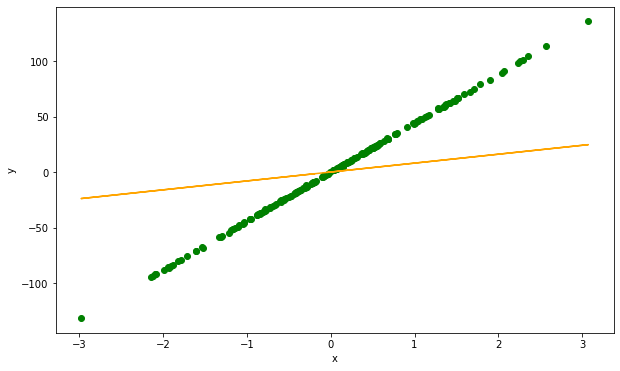

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,y_pred,color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()